# Group Project 

### Explooratory Data Anaylsis

In [2]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("traffic.csv", delim_whitespace = False, header = 1, names = ['Time', 'Date', 'Day of the week', 'CarCount','BikeCount', 'BusCount', 'TruckCount', 'Total', 'Traffic Situation'])
print(df[:-4])

             Time  Date Day of the week  CarCount  BikeCount  BusCount  \
0     12:15:00 AM    10         Tuesday        49          0         3   
1     12:30:00 AM    10         Tuesday        46          0         3   
2     12:45:00 AM    10         Tuesday        51          0         2   
3      1:00:00 AM    10         Tuesday        57          6        15   
4      1:15:00 AM    10         Tuesday        44          0         5   
...           ...   ...             ...       ...        ...       ...   
2966   9:45:00 PM     9        Thursday       107         14        10   
2967  10:00:00 PM     9        Thursday        17          4         1   
2968  10:15:00 PM     9        Thursday        11          4         1   
2969  10:30:00 PM     9        Thursday        11          4         0   
2970  10:45:00 PM     9        Thursday        16          3         1   

      TruckCount  Total Traffic Situation  
0              3     55               low  
1              6     55

In [8]:
def meanstd(x) :
    print("mean:")
    print(x.mean())
    print("standard deviation")
    print(x.std())

In [9]:
#traffic_wdummies = pd.get_dummies(traffic, drop_first = True)
#traffic_wdummies
#traffic_wdummies['Traffic Situation'].plot()

In [4]:
##Y = pd.factorize(df[['Time','Date','Day of the week','Traffic Situation']])
##time = pd.to_datetime(df[['Date', 'Time', 'Day of the week']], dayfirst = True)
df2 = df[['Date', 'Time', 'Day of the week', 'Traffic Situation']].apply( lambda x: pd.factorize(x)[0])
df3 = pd.concat([df2, df[['CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total']]], axis = 1)
df3

,Date,Time,Day of the week,Traffic Situation,CarCount,BikeCount,BusCount,TruckCount,Total
0,0,0,0,0,49,0,3,3,55
1,0,1,0,0,46,0,3,6,55
2,0,2,0,0,51,0,2,5,58
3,0,3,0,1,57,6,15,16,94
4,0,4,0,0,44,0,5,4,53
...,...,...,...,...,...,...,...,...,...
2970,30,90,2,1,16,3,1,36,56
2971,30,91,2,1,11,0,1,30,42
2972,30,92,2,1,15,4,1,25,45
2973,30,93,2,1,16,5,0,27,48


In [12]:
df3.corr()

,Date,Time,Day of the week,Traffic Situation,CarCount,BikeCount,BusCount,TruckCount,Total
Date,1.000000,0.000967,0.051372,0.040298,0.002119,-0.017504,0.007615,0.035498,0.005947
Time,0.000967,1.000000,0.000806,0.156410,0.106481,0.106836,0.128341,0.019761,0.137996
Day of the week,0.051372,0.000806,1.000000,-0.003411,-0.014988,0.000320,-0.017204,0.014623,-0.012874
Traffic Situation,0.040298,0.156410,-0.003411,1.000000,0.541185,0.406955,0.590050,-0.050442,0.630910
CarCount,0.002119,0.106481,-0.014988,0.541185,1.000000,0.722464,0.692927,-0.628644,0.970462
BikeCount,-0.017504,0.106836,0.000320,0.406955,0.722464,1.000000,0.566244,-0.576057,0.797332
BusCount,0.007615,0.128341,-0.017204,0.590050,0.692927,0.566244,1.000000,-0.547375,0.790664
TruckCount,0.035498,0.019761,0.014623,-0.050442,-0.628644,-0.576057,-0.547375,1.000000,-0.556172
Total,0.005947,0.137996,-0.012874,0.630910,0.970462,0.797332,0.790664,-0.556172,1.000000


In [13]:
df3.cov()

,Date,Time,Day of the week,Traffic Situation,CarCount,BikeCount,BusCount,TruckCount,Total
Date,79.978118,0.239657,0.921953,0.289459,0.868985,-2.011041,0.976715,3.366197,3.200856
Time,0.239657,767.674173,0.044839,3.480767,135.278981,38.027509,51.002340,5.805520,230.114350
Day of the week,0.921953,0.044839,4.027114,-0.005498,-1.379154,0.008241,-0.495169,0.311153,-1.554930
Traffic Situation,0.289459,3.480767,-0.005498,0.645124,19.931359,4.199152,6.797474,-0.429604,30.498381
CarCount,0.868985,135.278981,-1.379154,19.931359,2102.514962,425.578290,455.715907,-305.651863,2678.157296
BikeCount,-2.011041,38.027509,0.008241,4.199152,425.578290,165.039362,104.336065,-78.471440,616.482278
BusCount,0.976715,51.002340,-0.495169,6.797474,455.715907,104.336065,205.718940,-83.248193,682.522718
TruckCount,3.366197,5.805520,0.311153,-0.429604,-305.651863,-78.471440,-83.248193,112.435942,-354.935554
Total,3.200856,230.114350,-1.554930,30.498381,2678.157296,616.482278,682.522718,-354.935554,3622.226738


In [ ]:
import seaborn as sns

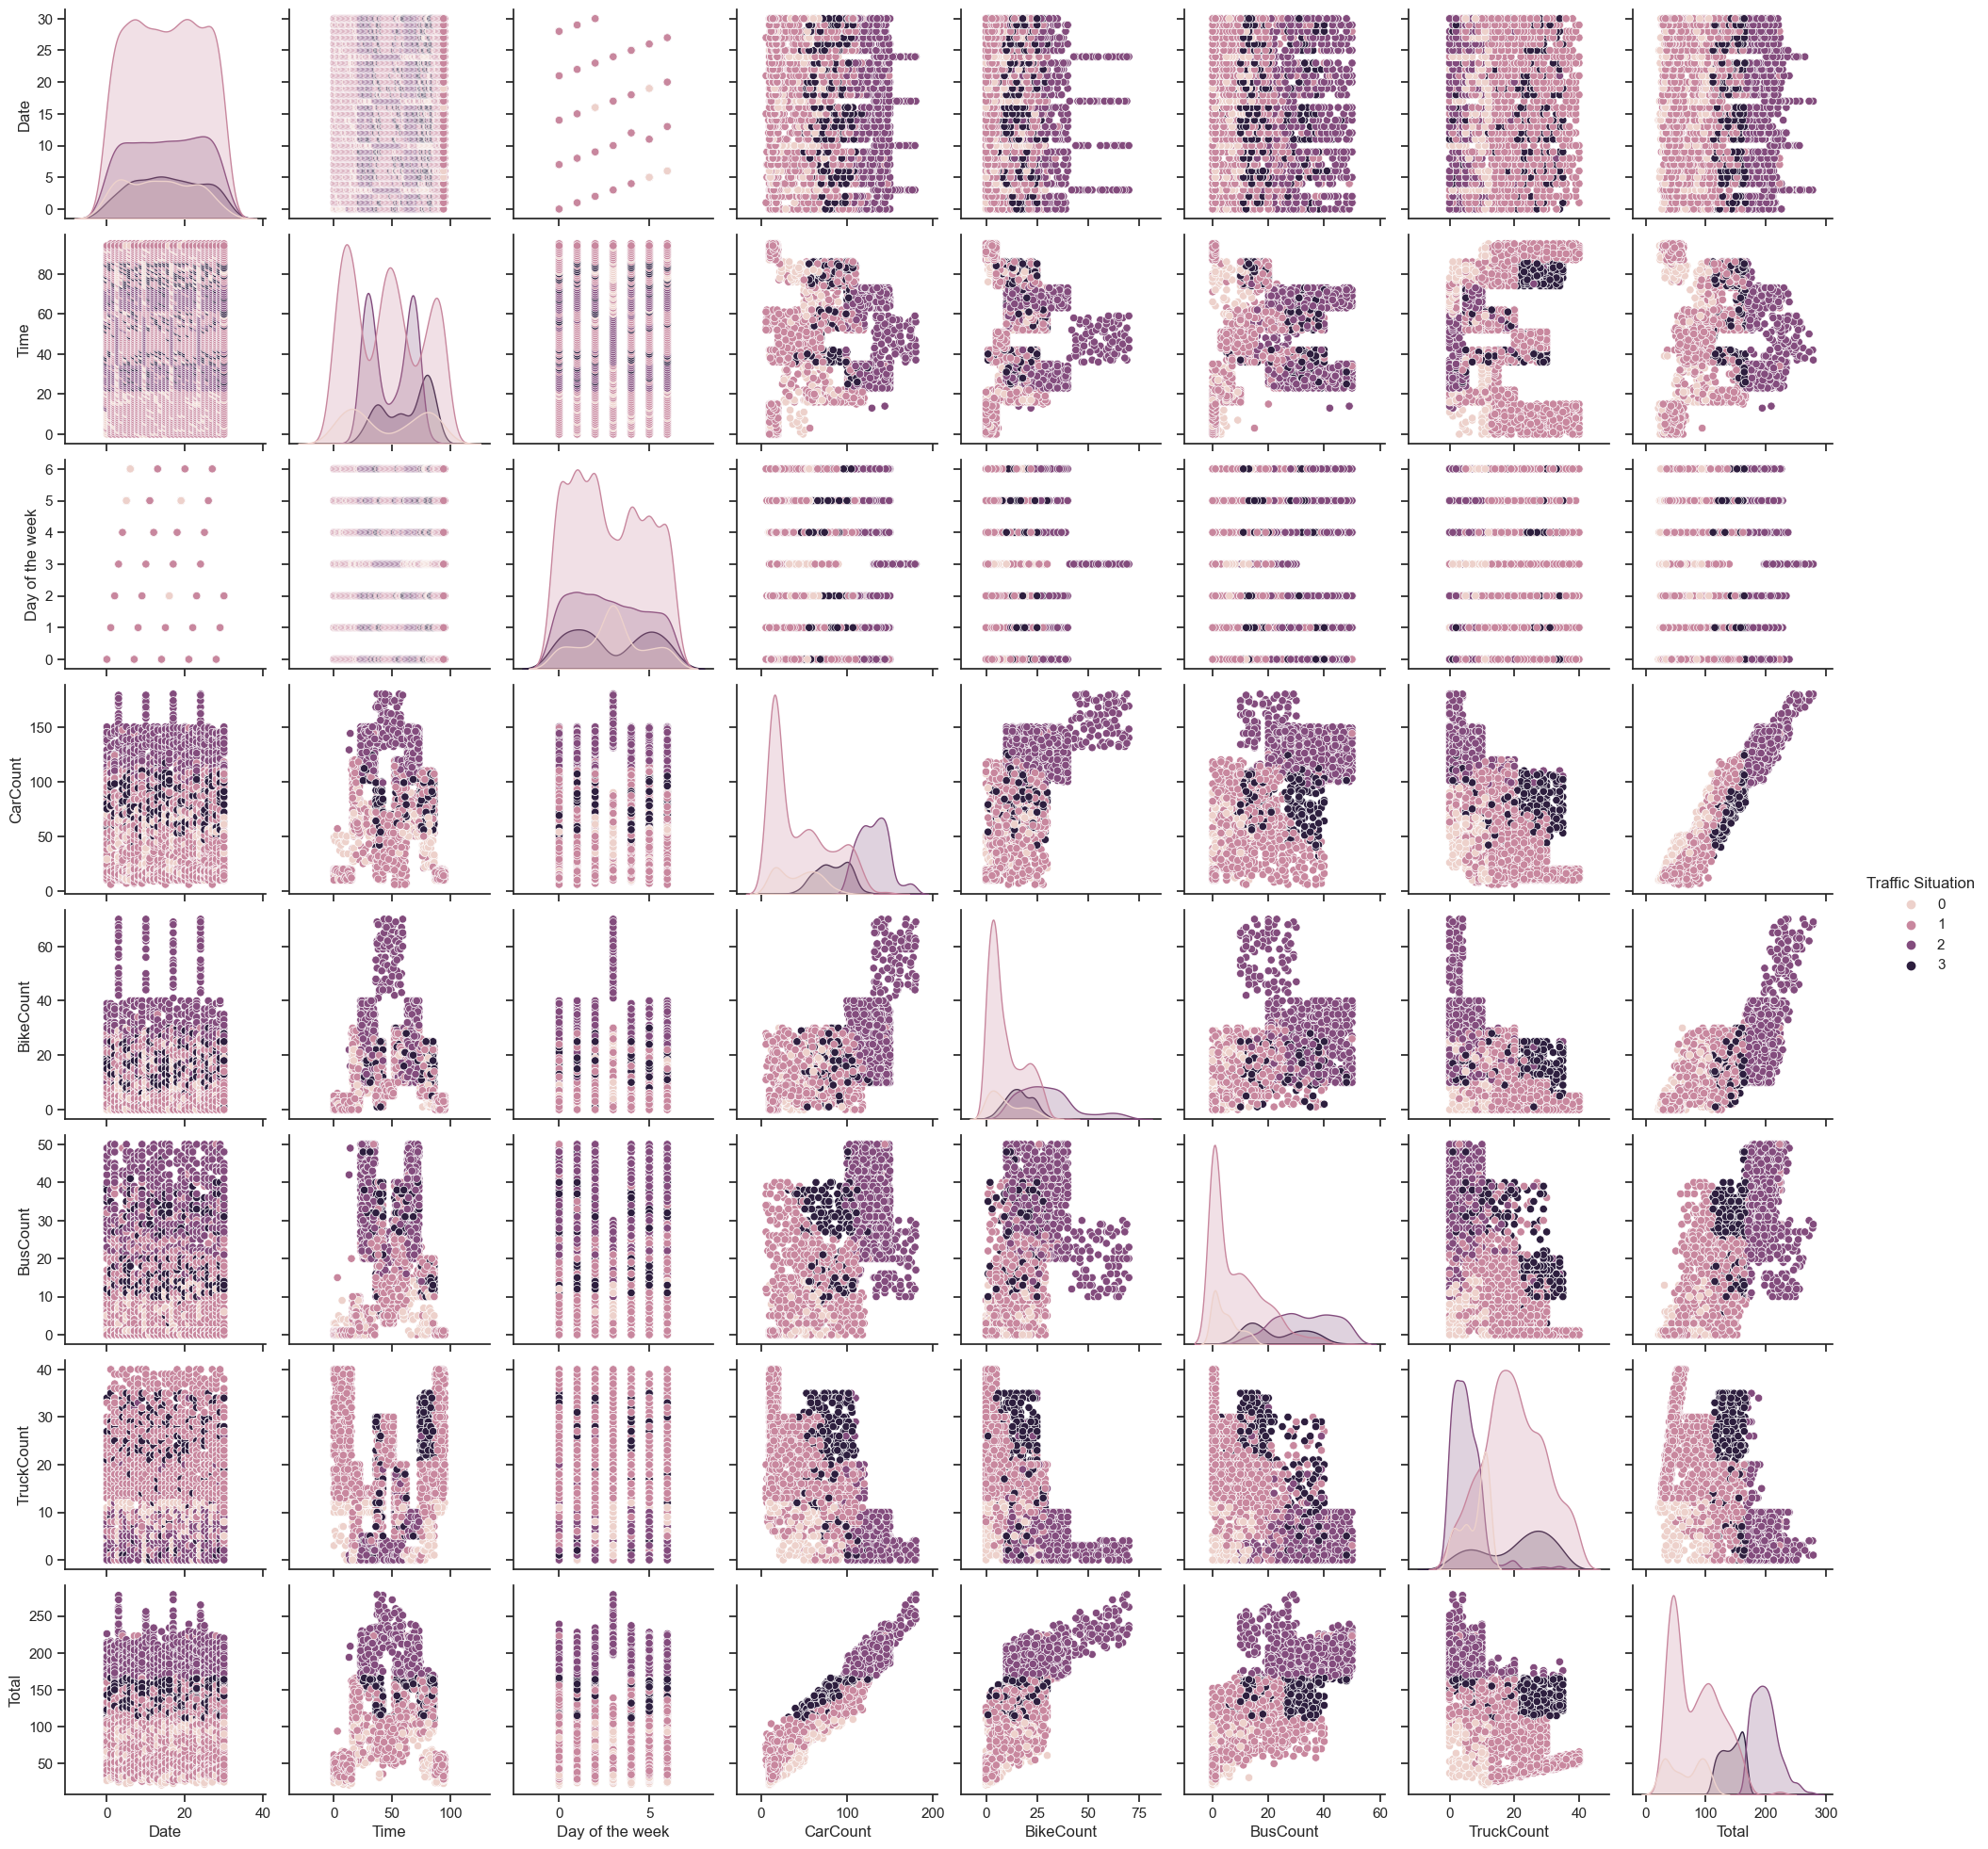

In [15]:
sns.set_theme(style="ticks")

sns.pairplot(df3, hue= "Traffic Situation")

In [16]:
meanstd(df3)

mean:
Date                  15.005042
Time                  47.484034
Day of the week        2.807395
Traffic Situation      1.343193
CarCount              68.709244
BikeCount             14.922353
BusCount              15.283361
TruckCount            15.328739
Total                114.243697
dtype: float64
standard deviation
Date                  8.943049
Time                 27.706934
Day of the week       2.006767
Traffic Situation     0.803196
CarCount             45.853189
BikeCount            12.846765
BusCount             14.342906
TruckCount           10.603582
Total                60.184938
dtype: float64


In [21]:
input_features = df3[['Date', 'Time', 'Day of the week', 'CarCount', 'BikeCount','BusCount','TruckCount', 'Total']]
sit = df3[['Traffic Situation']]
X_train, X_test, y_train, y_test = train_test_split(input_features, sit, test_size=0.25, random_state=27)
df_train, df_test = train_test_split(df3, test_size = 0.25, random_state=27)

In [89]:
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf

acf_original = plot_acf(X_train, y_train)

pacf_original = plot_pacf(X_train, y_train)

AttributeError: 'DataFrame' object has no attribute 'figure'

In [23]:
import pmdarima as pm
auto_arima = pm.auto_arima(y_train,X_train,stepwise = False, seasonal = False)
auto_arima

ARIMA(order=(3, 0, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [24]:
auto_model = pm.auto_arima(y=y_train, start_p=0, start_q=0, max_p=5,
                           max_q=5, start_P=0, start_Q=0, max_P=5,
                           max_Q=5, m=12, max_order=None,
                           trace=True, seasonal = True, seona)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=5312.291, Time=0.10 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=5313.546, Time=0.72 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=5313.379, Time=0.54 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=8278.376, Time=0.02 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=5314.184, Time=0.43 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=5314.177, Time=0.31 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=1.88 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=5311.702, Time=0.10 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=5313.538, Time=0.40 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=1.93 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=5311.745, Time=0.15 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=5312.606, Time=0.51 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=5311.547, Time=0.13 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=5313.387, Time=0.62 sec
 ARIMA(0,0,1)(1,0,1)[12] inte

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2231
Model:               SARIMAX(0, 0, 1)   Log Likelihood               -2652.773
Date:                Tue, 28 Nov 2023   AIC                           5311.547
Time:                        12:12:24   BIC                           5328.677
Sample:                             0   HQIC                          5317.802
                               - 2231                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.3263      0.019     69.494      0.000       1.289       1.364
ma.L1          0.0361      0.021      1.720      0.085      -0.005       0.077
sigma2         0.6314      0.021     30.069      0.000       0.590       0.673
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               118.50
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.08   Skew:                             0.56
Prob(H) (two-sided):                  0.30   Kurtosis:                         2.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

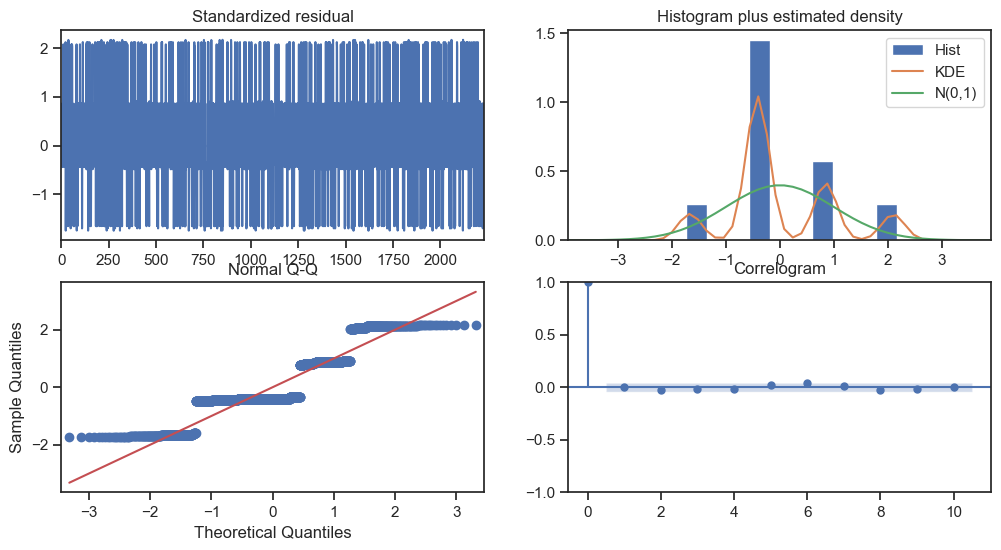

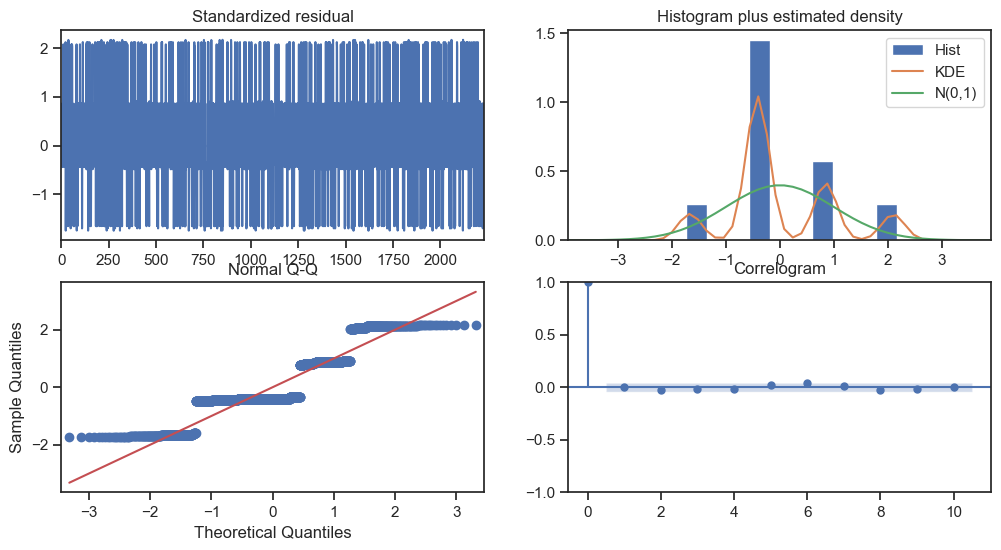

In [25]:
display(auto_model.summary())
auto_model.plot_diagnostics(figsize=(12,6))

In [29]:
import statsmodels

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.69681D+00    |proj g|=  2.15599D-01

At iterate    5    f=  1.64833D+00    |proj g|=  1.10452D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      6      9      1     0     0   7.111D-07   1.648D+00
  F =   1.6483261906074691     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/jennaodom/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/jennaodom/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:      Traffic Situation   No. Observations:                 2231
Model:               SARIMAX(0, 0, 1)   Log Likelihood               -3677.416
Date:                Tue, 28 Nov 2023   AIC                           7358.831
Time:                        12:22:33   BIC                           7370.250
Sample:                             0   HQIC                          7363.001
                               - 2231                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.5094      0.021     24.719      0.000       0.469       0.550
sigma2         1.5866      0.050     31.593      0.000       1.488       1.685
===================================================================================
Ljung-Box (L1) (Q):                 500.36   Jarque-Bera (JB):                35.70
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.13   Skew:                             0.31
Prob(H) (two-sided):                  0.10   Kurtosis:                         2.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/Users/jennaodom/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


TypeError: cannot do slice indexing on RangeIndex with these indexers [Traffic Situation] of type str

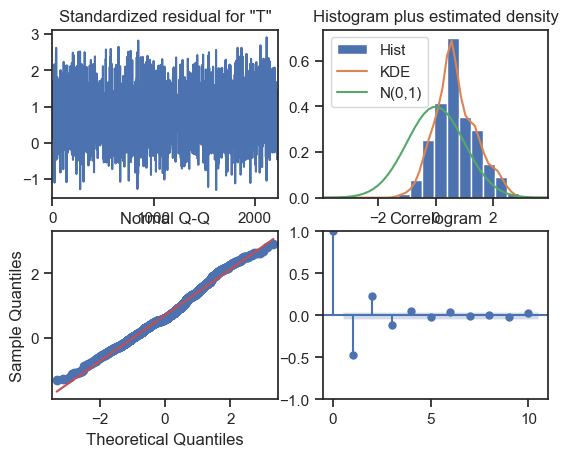

In [31]:
# Creating Final SARIMAX model
Final_model = statsmodels.tsa.statespace.sarimax.SARIMAX(y_train.astype('int'),
                    order=auto_model.order,
                    seasonal_order=auto_model.seasonal_order,
                    enforce_invertibility=False,
                    enforce_stationarity=False)
Final_output = Final_model.fit()
# Displaying the model summary and diagnostics
display(Final_output.summary());
Final_output.plot_diagnostics();
# Getting the forecast for 16 months
forecast = Final_output.get_forecast(steps = 16)
forecast_conf = forecast.conf_int()
# Plot observed values
ax = df3['Traffic Situation':].plot()
# Plot forecasted values
forecast.predicted_mean.plot(ax=ax, label='Forecast', color='red', alpha=0.9)
# Plot the range for confidence intervals
ax.fill_between(forecast_conf.index,
                forecast_conf.iloc[:, 0],
                forecast_conf.iloc[:, 1], color='g', alpha=0.1)
# Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.legend()
plt.show()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.72777D+00    |proj g|=  1.90367D-01

At iterate    5    f=  1.68253D+00    |proj g|=  6.08396D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      5      8      1     0     0   6.084D-06   1.683D+00
  F =   1.6825275289265114     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/jennaodom/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/jennaodom/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:      Traffic Situation   No. Observations:                  744
Model:               SARIMAX(0, 0, 1)   Log Likelihood               -1251.800
Date:                Tue, 28 Nov 2023   AIC                           2507.601
Time:                        12:41:06   BIC                           2516.820
Sample:                             0   HQIC                          2511.155
                                - 744                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.5172      0.037     13.920      0.000       0.444       0.590
sigma2         1.7089      0.097     17.607      0.000       1.519       1.899
===================================================================================
Ljung-Box (L1) (Q):                 161.38   Jarque-Bera (JB):                12.23
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.99   Skew:                             0.26
Prob(H) (two-sided):                  0.92   Kurtosis:                         2.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/Users/jennaodom/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


TypeError: cannot do slice indexing on RangeIndex with these indexers [Traffic Situation] of type str

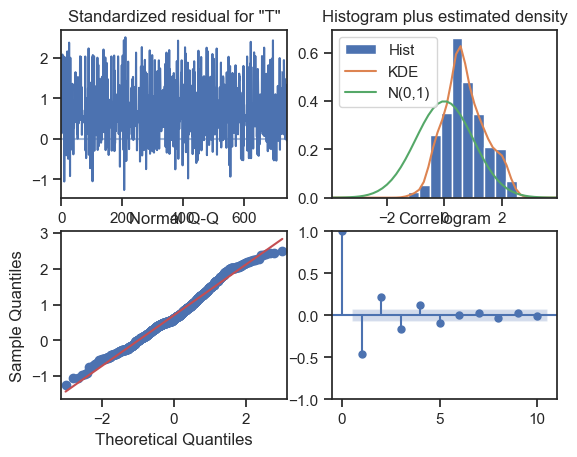

In [32]:
Final_model = statsmodels.tsa.statespace.sarimax.SARIMAX(y_test.astype('int'),
                    order=auto_model.order,
                    seasonal_order=auto_model.seasonal_order,
                    enforce_invertibility=False,
                    enforce_stationarity=False)
Final_output = Final_model.fit()
# Displaying the model summary and diagnostics
display(Final_output.summary());
Final_output.plot_diagnostics();
# Getting the forecast for 16 months
forecast = Final_output.get_forecast(steps = 16)
forecast_conf = forecast.conf_int()
# Plot observed values
ax = df3['Traffic Situation':].plot()
# Plot forecasted values
forecast.predicted_mean.plot(ax=ax, label='Forecast', color='red', alpha=0.9)
# Plot the range for confidence intervals
ax.fill_between(forecast_conf.index,
                forecast_conf.iloc[:, 0],
                forecast_conf.iloc[:, 1], color='g', alpha=0.1)
# Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.legend()
plt.show()

In [101]:
adf_test = pm.arima.ADFTest(alpha = 0.05)
adf_test.should_diff(df3['Time'])

(0.01, False)